In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


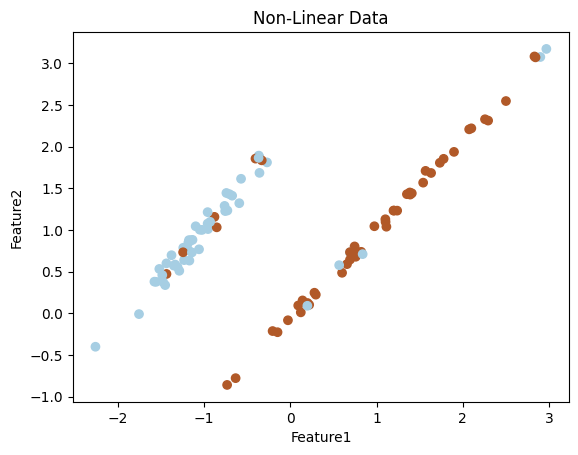

In [31]:
X, Y = make_classification(n_samples=100,n_informative=2,n_features=2,n_clusters_per_class=1,n_redundant=0,n_classes=2,flip_y = 0.1,random_state=42)
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.Paired)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Non-Linear Data')
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [33]:
clf.fit(X,Y)

LogisticRegression()

<Axes: >

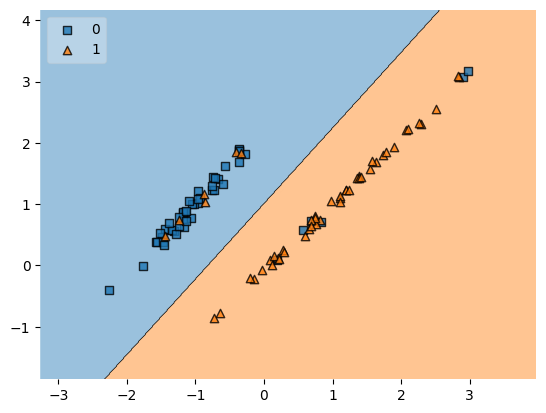

In [34]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,Y.astype('int'),clf,legend=2)

In [35]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,Y,scoring='accuracy',cv=10))

0.8800000000000001

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [37]:
clf1 = LogisticRegression()
clf1.fit(X_trf,Y)
np.mean(cross_val_score(clf1,X_trf,Y,scoring='accuracy',cv=10))


0.86

In [48]:
def plot_decision_boundary(X,Y,degree=1):

    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)

    clf.fit(X_trf,Y)

    accuracy = np.mean(cross_val_score(clf,X_trf,Y,scoring='accuracy',cv=10))

    a = np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b = np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY = np.meshgrid(a,b)
    
    input_array = np.array([XX.ravel(),YY.ravel()]).T

    labels  = clf.predict(poly.transform(input_array))

    plt.contour(XX,YY,labels.reshape(XX.shape),alpha=0.5)

    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))


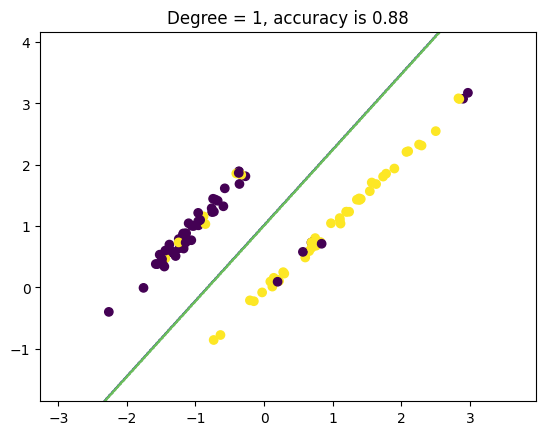

In [49]:
plot_decision_boundary(X,Y)

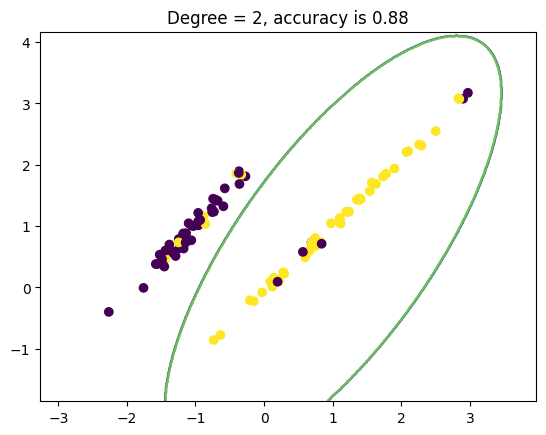

In [50]:
plot_decision_boundary(X,Y,degree=2)

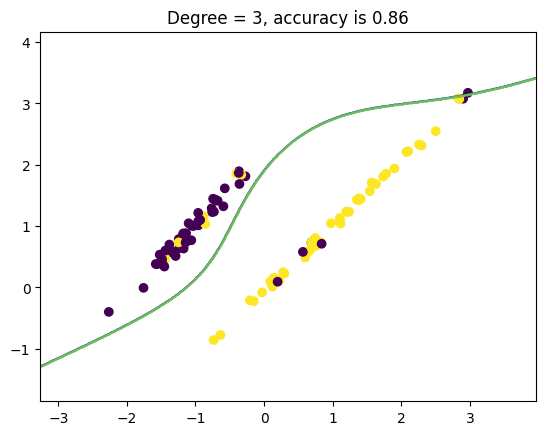

In [51]:
plot_decision_boundary(X,Y,3)

/home/jatin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jatin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

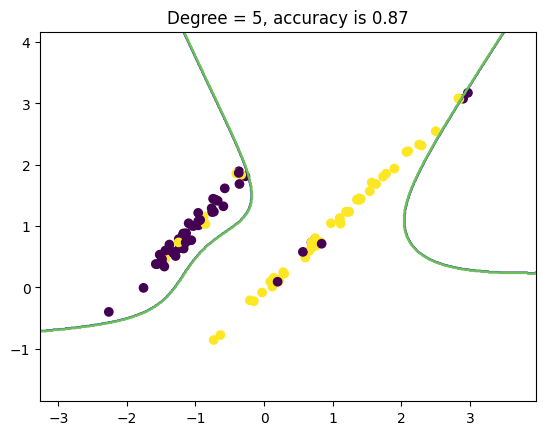

In [52]:
plot_decision_boundary(X,Y,degree=5)